In [1]:
 # Importing all the libraries that I may need for this model.

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)
from collections import Counter
#Installing SMOTE
!pip install imbalanced-learn
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
df = pd.read_csv("Pokemon Mythical.csv")


count_no_legendary = len(df[df['Legendary']==0])
count_legendary = len(df[df['Legendary']==1])
pct_of_no_live = count_no_legendary/(count_no_legendary+count_legendary)
print("percentage of standard pokemon is", pct_of_no_live*100)
pct_of_lived = count_legendary/(count_no_legendary+count_legendary)
print("percentage of legendary", pct_of_lived*100)
print (str(count_legendary)  + " are legendary and " + str(count_no_legendary) + " aren't.")


#Converting all of the values in the "Type 1" column to be columns in a new dataframe.
"""df_types = pd.get_dummies(df["Type 1"])
df_types_2 = pd.get_dummies(df["Type 2"])
df_types = df_types.replace("NaN", 0)"""

df["Type 1"] = df["Type 1"].fillna(0)
df["Type 1"] = df["Type 1"].replace("Normal", 1)
df["Type 1"] = df["Type 1"].replace("Fire", 2)
df["Type 1"] = df["Type 1"].replace("Water", 3)
df["Type 1"] = df["Type 1"].replace("Grass", 4)
df["Type 1"] = df["Type 1"].replace("Electric", 5)
df["Type 1"] = df["Type 1"].replace("Ice", 6)
df["Type 1"] = df["Type 1"].replace("Fighting", 7)
df["Type 1"] = df["Type 1"].replace("Poison", 8)
df["Type 1"] = df["Type 1"].replace("Ground", 9)
df["Type 1"] = df["Type 1"].replace("Flying", 10)
df["Type 1"] = df["Type 1"].replace("Psychic", 11)
df["Type 1"] = df["Type 1"].replace("Bug", 12)
df["Type 1"] = df["Type 1"].replace("Rock", 13)
df["Type 1"] = df["Type 1"].replace("Ghost", 14)
df["Type 1"] = df["Type 1"].replace("Dark", 15)
df["Type 1"] = df["Type 1"].replace("Steel", 16)
df["Type 1"] = df["Type 1"].replace("Dragon", 17)
df["Type 1"] = df["Type 1"].replace("Fairy", 18)

#Converting all of the values in the "Type 2" column to be columns in a new dataframe.
#Could have used dummies but wasn't exactly sure how to implement it properly
df["Type 2"] = df["Type 2"].fillna(0)
df["Type 2"] = df["Type 2"].replace("Normal", 1)
df["Type 2"] = df["Type 2"].replace("Fire", 2)
df["Type 2"] = df["Type 2"].replace("Water", 3)
df["Type 2"] = df["Type 2"].replace("Grass", 4)
df["Type 2"] = df["Type 2"].replace("Electric", 5)
df["Type 2"] = df["Type 2"].replace("Ice", 6)
df["Type 2"] = df["Type 2"].replace("Fighting", 7)
df["Type 2"] = df["Type 2"].replace("Poison", 8)
df["Type 2"] = df["Type 2"].replace("Ground", 9)
df["Type 2"] = df["Type 2"].replace("Flying", 10)
df["Type 2"] = df["Type 2"].replace("Psychic", 11)
df["Type 2"] = df["Type 2"].replace("Bug", 12)
df["Type 2"] = df["Type 2"].replace("Rock", 13)
df["Type 2"] = df["Type 2"].replace("Ghost", 14)
df["Type 2"] = df["Type 2"].replace("Dark", 15)
df["Type 2"] = df["Type 2"].replace("Steel", 16)
df["Type 2"] = df["Type 2"].replace("Dragon", 17)
df["Type 2"] = df["Type 2"].replace("Fairy", 18)

#Renaming columns and features to numerical values so that the model can read it.
df.rename(columns = {'#':'num'}, inplace = True)
df["Legendary"] = df["Legendary"].replace("False", 0)
df["Legendary"] = df["Legendary"].replace("True", 1)
#df2['f','o'] = df['Name'].str.split(pat=',')
#df3 = df2['1'].str.split(pat='.',expand=True)

df["Mythical"] = df["Mythical"].fillna(False)
print(df.info())



percentage of standard pokemon is 93.625
percentage of legendary 6.375
51 are legendary and 749 aren't.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   num         800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    int64 
 3   Type 2      800 non-null    int64 
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
 13  Mythical    800 non-null    bool  
dtypes: bool(2), int64(11), object(1)
memory usage: 76.7+ KB
None


In [3]:
#Creating a new feature to determine whether a pokemon is a mega or not based on it's name
is_mega = []
#print(df["Name"].to_list())
#print(df["Name"][3].find("Mega"))
for name in df["Name"].to_list():
  if name.find("Mega") != -1:
    is_mega.append(1)
  else:
    is_mega.append(0)
df['Mega'] = is_mega
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   num         800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    int64 
 3   Type 2      800 non-null    int64 
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
 13  Mythical    800 non-null    bool  
 14  Mega        800 non-null    int64 
dtypes: bool(2), int64(12), object(1)
memory usage: 82.9+ KB
None


<function matplotlib.pyplot.show(*args, **kw)>

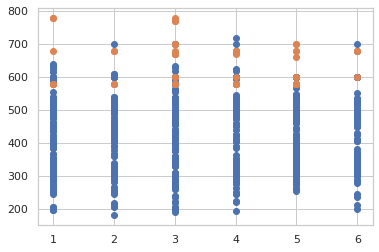

In [4]:
is_legend = df[df['Legendary']==1]
not_legend = df[df['Legendary']==0]
plt.scatter(not_legend["Generation"],not_legend["Total"])
plt.scatter(is_legend["Generation"],is_legend["Total"])
plt.show

In [5]:

df2 = df.copy()
df2.drop(["Name"], axis = 1, inplace = True)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num         800 non-null    int64
 1   Type 1      800 non-null    int64
 2   Type 2      800 non-null    int64
 3   Total       800 non-null    int64
 4   HP          800 non-null    int64
 5   Attack      800 non-null    int64
 6   Defense     800 non-null    int64
 7   Sp. Atk     800 non-null    int64
 8   Sp. Def     800 non-null    int64
 9   Speed       800 non-null    int64
 10  Generation  800 non-null    int64
 11  Legendary   800 non-null    bool 
 12  Mythical    800 non-null    bool 
 13  Mega        800 non-null    int64
dtypes: bool(2), int64(12)
memory usage: 76.7 KB
None


In [6]:

#Splitting the data into test and train sets
import random
seed = random.randint(0,1000)
from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df2, random_state = seed, test_size = 0.30) 

X_train = trainingSet[['Total', 'Generation', "Type 1", "Type 2", "Mega", "Mythical"]] 	

y_train = trainingSet["Legendary"]

X_test = testSet[['Total', 'Generation', "Type 1", "Type 2", "Mega", "Mythical"]] 	

y_test = testSet["Legendary"]
df

,num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mythical,Mega
0,1,Bulbasaur,4,8,318,45,49,49,65,65,45,1,False,False,0
1,2,Ivysaur,4,8,405,60,62,63,80,80,60,1,False,False,0
2,3,Venusaur,4,8,525,80,82,83,100,100,80,1,False,False,0
3,3,VenusaurMega Venusaur,4,8,625,80,100,123,122,120,80,1,False,False,1
4,4,Charmander,2,0,309,39,52,43,60,50,65,1,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,13,18,600,50,100,150,100,150,50,6,False,True,0
796,719,DiancieMega Diancie,13,18,700,50,160,110,160,110,110,6,False,True,1
797,720,HoopaHoopa Confined,11,14,600,80,110,60,150,130,70,6,False,True,0
798,720,HoopaHoopa Unbound,11,15,680,80,160,60,170,130,80,6,False,True,0


In [7]:
#using SMOTE to balance the dataset (generating more legendary pokemon for the training data)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({False: 520, True: 40})
After SMOTE : Counter({False: 520, True: 520})


In [8]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()
logreg.fit(X_train_smote,y_train_smote)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Important features:**


In [9]:
print(accuracy_score(y_test,y_pred))
pd.crosstab(y_test,y_pred)

0.9458333333333333


col_0,False,True
Legendary,,
False,216,13
True,0,11


In [10]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,max_depth=7)
forest.fit(X_train_smote,y_train_smote)
y_pred = forest.predict(X_test)


In [11]:
print(accuracy_score(y_test,y_pred))
pd.crosstab(y_test,y_pred)

0.9875


col_0,False,True
Legendary,,
False,226,3
True,0,11
